 # RP - GPFA: Poisson Bouncing Ball
 
 Recognition Parametrised Gaussian Process Factor Analysis on a Bouncing Ball Experiment with Poisson Noise.
 
 Inference uses a **2nd Order Approximation**.

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from utils_process import linear_regression_1D_latent
from utils import generate_2D_latent, generate_skewed_pixel_from_latent, diagonalize

from unstructured_recognition_gpfa import UnstructuredRecognition

## Generate Data

In [2]:
# data type
data_type = torch.float32
torch.set_default_dtype(data_type)

# Reproducibility
np.random.seed(1)
torch.manual_seed(1)


# Dimension of the observations
num_observation = 5
dim_observation = 10
len_observation = 50
num_inducing = 20

# Sampling Frequency
F = 10

# Length of Each sample [sec]
T = int(len_observation / F)

# Oscillation Frequency
omega = 0.5

# Random initializations
theta = 2*np.pi*np.random.rand(num_observation)
z0 = torch.tensor(np.array([np.cos(theta), np.sin(theta)]).T)
zt, _ = generate_2D_latent(T, F, omega, z0)

# True Latent
true_latent_ext = zt[:, 1:, 0] .unsqueeze(-1)

# From Latent Position to Pixel Rate
vari_th = 1
scale_th = 0.6
mean_rate_loc = torch.linspace(-1, 1, dim_observation).unsqueeze(0).unsqueeze(0)
rate_model = (vari_th**2) * torch.exp(-(mean_rate_loc - true_latent_ext)**2 / scale_th**2)

observation_locations = torch.arange(0, len_observation, 1).unsqueeze(-1)
inducing_locations = torch.arange(0, len_observation, len_observation / num_inducing).unsqueeze(-1)


# Sample Observations
observations = (torch.poisson(10*rate_model),)

## Plot Observations

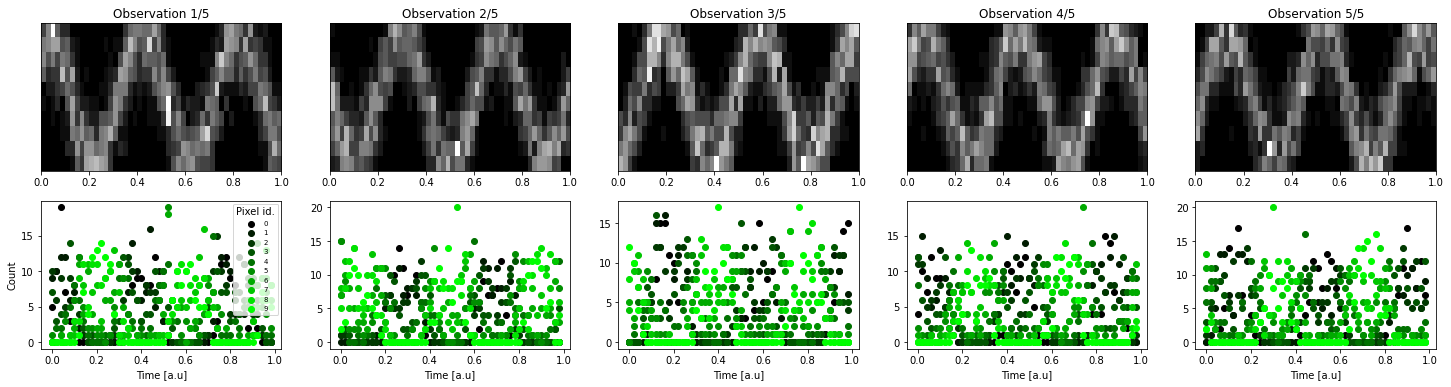

In [3]:
# Colors
color_position = torch.cat((
    torch.linspace(0, 0, dim_observation).unsqueeze(1),
    torch.linspace(0, 1, dim_observation).unsqueeze(1),
    torch.linspace(0, 0, dim_observation).unsqueeze(1)),
    dim=1)

# Select which observation to plot
plot_index = [0, num_observation-1]
plot_index = np.arange(num_observation)

plt.figure(figsize=(5 * len(plot_index), 3 * 2))
# Plot Observations
for egobs_id in range(len(plot_index)):
    
    obs_cur = observations[0][egobs_id]
    xx = np.arange(obs_cur.shape[0]) / obs_cur.shape[0]
    
    egobs = plot_index[egobs_id]

    plt.subplot(2, len(plot_index), egobs_id + 1)
    plt.imshow(obs_cur.transpose(-1, -2), aspect='auto', cmap='gray',extent=[0, 1, -1, 1])
    plt.title('Observation ' + str(egobs+1) + '/' + str(num_observation))
    plt.yticks([])
    
    plt.subplot(2, len(plot_index), egobs_id + 1 + len(plot_index))
    for dd in range(dim_observation):
        plt.scatter(xx, obs_cur[:, dd], color=color_position[dd].numpy(), label=str(dd))
    if egobs_id == 0:
        plt.legend(title="Pixel id.", prop={'size': 7}, loc=1)
        plt.ylabel('Count')
    plt.xlabel('Time [a.u]')

## Fit RP-GPFA

In [4]:
fit_params = {'dim_latent': 1,
               'inference_mode': '2ndOrder',
               'ite_out': 800,
               'optimizer_prior': {'name': 'Adam', 'param': {'lr': 0.5e-3}},
               'optimizer_factors': {'name': 'Adam', 'param': {'lr': 1e-3}},
               'optimizer_inducing_points': {'name': 'Adam', 'param': {'lr': 0.5e-3}},
               'dim_hidden': ([20, 20],),
               'ergodic':True
                }

# Init Model
model = UnstructuredRecognition(observations, observation_locations,
                                inducing_locations=inducing_locations, fit_params=fit_params)


# Fit Model
loss_tot = model.fit(observations)



cpu
Iterations 0/800 Loss: 1.324676e+11


/home/sou/Documents/PYTHON/RPGPFA/unstructured_recognition_gpfa.py:572: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dtype=self.dtype, device=self.device, requires_grad=True)
/home/sou/Documents/PYTHON/RPGPFA/unstructured_recognition_gpfa.py:574: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  dtype=self.dtype, device=self.device, requires_grad=True)


Iterations 1/800 Loss: 1.324676e+11 Prior
Iterations 1/800 Loss: 1.324676e+11 Inducing Points
Iterations 1/800 Loss: 5.447028e+07 Factors
Iterations 2/800 Loss: 2.359382e+07 Prior
Iterations 2/800 Loss: 2.359368e+07 Inducing Points
Iterations 2/800 Loss: 3.240423e+03 Factors
Iterations 3/800 Loss: 4.186537e+06 Prior
Iterations 3/800 Loss: 4.186426e+06 Inducing Points
Iterations 3/800 Loss: 3.170387e+05 Factors
Iterations 4/800 Loss: 2.802838e+06 Prior
Iterations 4/800 Loss: 2.802740e+06 Inducing Points
Iterations 4/800 Loss: 3.314383e+03 Factors
Iterations 5/800 Loss: 2.099267e+06 Prior
Iterations 5/800 Loss: 2.099180e+06 Inducing Points
Iterations 5/800 Loss: 3.078302e+03 Factors
Iterations 6/800 Loss: 1.922910e+06 Prior
Iterations 6/800 Loss: 1.922832e+06 Inducing Points
Iterations 6/800 Loss: 5.585402e+03 Factors
Iterations 7/800 Loss: 1.703352e+06 Prior
Iterations 7/800 Loss: 1.703279e+06 Inducing Points
Iterations 7/800 Loss: 4.523304e+03 Factors
Iterations 8/800 Loss: 1.556936e+0

Iterations 59/800 Loss: 5.389578e+03 Inducing Points
Iterations 59/800 Loss: 2.601248e+03 Factors
Iterations 60/800 Loss: 5.277073e+03 Prior
Iterations 60/800 Loss: 5.204360e+03 Inducing Points
Iterations 60/800 Loss: 2.657642e+03 Factors
Iterations 61/800 Loss: 5.109584e+03 Prior
Iterations 61/800 Loss: 5.042162e+03 Inducing Points
Iterations 61/800 Loss: 2.573114e+03 Factors
Iterations 62/800 Loss: 4.956198e+03 Prior
Iterations 62/800 Loss: 4.893480e+03 Inducing Points
Iterations 62/800 Loss: 2.539550e+03 Factors
Iterations 63/800 Loss: 4.806900e+03 Prior
Iterations 63/800 Loss: 4.748816e+03 Inducing Points
Iterations 63/800 Loss: 2.350680e+03 Factors
Iterations 64/800 Loss: 4.672688e+03 Prior
Iterations 64/800 Loss: 4.618385e+03 Inducing Points
Iterations 64/800 Loss: 2.169461e+03 Factors
Iterations 65/800 Loss: 4.546200e+03 Prior
Iterations 65/800 Loss: 4.495526e+03 Inducing Points
Iterations 65/800 Loss: 2.247395e+03 Factors
Iterations 66/800 Loss: 4.429534e+03 Prior
Iterations 66

Iterations 117/800 Loss: 2.270952e+03 Inducing Points
Iterations 117/800 Loss: 1.669712e+03 Factors
Iterations 118/800 Loss: 2.265957e+03 Prior
Iterations 118/800 Loss: 2.255191e+03 Inducing Points
Iterations 118/800 Loss: 1.612553e+03 Factors
Iterations 119/800 Loss: 2.249913e+03 Prior
Iterations 119/800 Loss: 2.239451e+03 Inducing Points
Iterations 119/800 Loss: 1.563482e+03 Factors
Iterations 120/800 Loss: 2.234334e+03 Prior
Iterations 120/800 Loss: 2.224121e+03 Inducing Points
Iterations 120/800 Loss: 1.609586e+03 Factors
Iterations 121/800 Loss: 2.219226e+03 Prior
Iterations 121/800 Loss: 2.209256e+03 Inducing Points
Iterations 121/800 Loss: 1.651357e+03 Factors
Iterations 122/800 Loss: 2.204483e+03 Prior
Iterations 122/800 Loss: 2.194832e+03 Inducing Points
Iterations 122/800 Loss: 1.619328e+03 Factors
Iterations 123/800 Loss: 2.190822e+03 Prior
Iterations 123/800 Loss: 2.181387e+03 Inducing Points
Iterations 123/800 Loss: 1.612893e+03 Factors
Iterations 124/800 Loss: 2.176585e+0

Iterations 174/800 Loss: 1.435399e+03 Inducing Points
Iterations 174/800 Loss: 1.404879e+03 Factors
Iterations 175/800 Loss: 1.433378e+03 Prior
Iterations 175/800 Loss: 1.431279e+03 Inducing Points
Iterations 175/800 Loss: 1.390875e+03 Factors
Iterations 176/800 Loss: 1.429271e+03 Prior
Iterations 176/800 Loss: 1.427218e+03 Inducing Points
Iterations 176/800 Loss: 1.402195e+03 Factors
Iterations 177/800 Loss: 1.425714e+03 Prior
Iterations 177/800 Loss: 1.423762e+03 Inducing Points
Iterations 177/800 Loss: 1.413886e+03 Factors
Iterations 178/800 Loss: 1.422524e+03 Prior
Iterations 178/800 Loss: 1.420663e+03 Inducing Points
Iterations 178/800 Loss: 1.403881e+03 Factors
Iterations 179/800 Loss: 1.419799e+03 Prior
Iterations 179/800 Loss: 1.418024e+03 Inducing Points
Iterations 179/800 Loss: 1.401913e+03 Factors
Iterations 180/800 Loss: 1.417150e+03 Prior
Iterations 180/800 Loss: 1.415445e+03 Inducing Points
Iterations 180/800 Loss: 1.393874e+03 Factors
Iterations 181/800 Loss: 1.414666e+0

Iterations 231/800 Loss: 1.339630e+03 Inducing Points
Iterations 231/800 Loss: 1.363310e+03 Factors
Iterations 232/800 Loss: 1.339350e+03 Prior
Iterations 232/800 Loss: 1.338386e+03 Inducing Points
Iterations 232/800 Loss: 1.365488e+03 Factors
Iterations 233/800 Loss: 1.338105e+03 Prior
Iterations 233/800 Loss: 1.337154e+03 Inducing Points
Iterations 233/800 Loss: 1.375910e+03 Factors
Iterations 234/800 Loss: 1.336811e+03 Prior
Iterations 234/800 Loss: 1.335839e+03 Inducing Points
Iterations 234/800 Loss: 1.380994e+03 Factors
Iterations 235/800 Loss: 1.335569e+03 Prior
Iterations 235/800 Loss: 1.334605e+03 Inducing Points
Iterations 235/800 Loss: 1.375536e+03 Factors
Iterations 236/800 Loss: 1.334275e+03 Prior
Iterations 236/800 Loss: 1.333311e+03 Inducing Points
Iterations 236/800 Loss: 1.382624e+03 Factors
Iterations 237/800 Loss: 1.332827e+03 Prior
Iterations 237/800 Loss: 1.331818e+03 Inducing Points
Iterations 237/800 Loss: 1.371443e+03 Factors
Iterations 238/800 Loss: 1.331139e+0

Iterations 288/800 Loss: 1.265785e+03 Inducing Points
Iterations 288/800 Loss: 1.358420e+03 Factors
Iterations 289/800 Loss: 1.266128e+03 Prior
Iterations 289/800 Loss: 1.265442e+03 Inducing Points
Iterations 289/800 Loss: 1.358566e+03 Factors
Iterations 290/800 Loss: 1.264305e+03 Prior
Iterations 290/800 Loss: 1.263771e+03 Inducing Points
Iterations 290/800 Loss: 1.356492e+03 Factors
Iterations 291/800 Loss: 1.263420e+03 Prior
Iterations 291/800 Loss: 1.262988e+03 Inducing Points
Iterations 291/800 Loss: 1.353251e+03 Factors
Iterations 292/800 Loss: 1.262616e+03 Prior
Iterations 292/800 Loss: 1.262062e+03 Inducing Points
Iterations 292/800 Loss: 1.348870e+03 Factors
Iterations 293/800 Loss: 1.261557e+03 Prior
Iterations 293/800 Loss: 1.261041e+03 Inducing Points
Iterations 293/800 Loss: 1.364726e+03 Factors
Iterations 294/800 Loss: 1.260675e+03 Prior
Iterations 294/800 Loss: 1.260234e+03 Inducing Points
Iterations 294/800 Loss: 1.361071e+03 Factors
Iterations 295/800 Loss: 1.259848e+0

Iterations 345/800 Loss: 1.238344e+03 Inducing Points
Iterations 345/800 Loss: 1.350578e+03 Factors
Iterations 346/800 Loss: 1.237601e+03 Prior
Iterations 346/800 Loss: 1.237367e+03 Inducing Points
Iterations 346/800 Loss: 1.342892e+03 Factors
Iterations 347/800 Loss: 1.238667e+03 Prior
Iterations 347/800 Loss: 1.237808e+03 Inducing Points
Iterations 347/800 Loss: 1.349199e+03 Factors
Iterations 348/800 Loss: 1.239943e+03 Prior
Iterations 348/800 Loss: 1.239519e+03 Inducing Points
Iterations 348/800 Loss: 1.339132e+03 Factors
Iterations 349/800 Loss: 1.236776e+03 Prior
Iterations 349/800 Loss: 1.237929e+03 Inducing Points
Iterations 349/800 Loss: 1.347017e+03 Factors
Iterations 350/800 Loss: 1.236467e+03 Prior
Iterations 350/800 Loss: 1.237300e+03 Inducing Points
Iterations 350/800 Loss: 1.342278e+03 Factors
Iterations 351/800 Loss: 1.235755e+03 Prior
Iterations 351/800 Loss: 1.236137e+03 Inducing Points
Iterations 351/800 Loss: 1.337248e+03 Factors
Iterations 352/800 Loss: 1.236657e+0

Iterations 402/800 Loss: 1.204465e+03 Inducing Points
Iterations 402/800 Loss: 1.335804e+03 Factors
Iterations 403/800 Loss: 1.204821e+03 Prior
Iterations 403/800 Loss: 1.205466e+03 Inducing Points
Iterations 403/800 Loss: 1.328454e+03 Factors
Iterations 404/800 Loss: 1.203760e+03 Prior
Iterations 404/800 Loss: 1.203975e+03 Inducing Points
Iterations 404/800 Loss: 1.337374e+03 Factors
Iterations 405/800 Loss: 1.205190e+03 Prior
Iterations 405/800 Loss: 1.203382e+03 Inducing Points
Iterations 405/800 Loss: 1.341231e+03 Factors
Iterations 406/800 Loss: 1.202836e+03 Prior
Iterations 406/800 Loss: 1.200670e+03 Inducing Points
Iterations 406/800 Loss: 1.335259e+03 Factors
Iterations 407/800 Loss: 1.200898e+03 Prior
Iterations 407/800 Loss: 1.202009e+03 Inducing Points
Iterations 407/800 Loss: 1.330704e+03 Factors
Iterations 408/800 Loss: 1.199499e+03 Prior
Iterations 408/800 Loss: 1.199271e+03 Inducing Points
Iterations 408/800 Loss: 1.332835e+03 Factors
Iterations 409/800 Loss: 1.198955e+0

Iterations 459/800 Loss: 1.178444e+03 Inducing Points
Iterations 459/800 Loss: 1.333297e+03 Factors
Iterations 460/800 Loss: 1.177471e+03 Prior
Iterations 460/800 Loss: 1.175617e+03 Inducing Points
Iterations 460/800 Loss: 1.337581e+03 Factors
Iterations 461/800 Loss: 1.177712e+03 Prior
Iterations 461/800 Loss: 1.179302e+03 Inducing Points
Iterations 461/800 Loss: 1.325802e+03 Factors
Iterations 462/800 Loss: 1.178287e+03 Prior
Iterations 462/800 Loss: 1.175195e+03 Inducing Points
Iterations 462/800 Loss: 1.326357e+03 Factors
Iterations 463/800 Loss: 1.178139e+03 Prior
Iterations 463/800 Loss: 1.173984e+03 Inducing Points
Iterations 463/800 Loss: 1.329814e+03 Factors
Iterations 464/800 Loss: 1.178621e+03 Prior
Iterations 464/800 Loss: 1.179371e+03 Inducing Points
Iterations 464/800 Loss: 1.331500e+03 Factors
Iterations 465/800 Loss: 1.174877e+03 Prior
Iterations 465/800 Loss: 1.175093e+03 Inducing Points
Iterations 465/800 Loss: 1.322802e+03 Factors
Iterations 466/800 Loss: 1.176647e+0

Iterations 516/800 Loss: 1.158976e+03 Inducing Points
Iterations 516/800 Loss: 1.332565e+03 Factors
Iterations 517/800 Loss: 1.158838e+03 Prior
Iterations 517/800 Loss: 1.157017e+03 Inducing Points
Iterations 517/800 Loss: 1.318650e+03 Factors
Iterations 518/800 Loss: 1.160977e+03 Prior
Iterations 518/800 Loss: 1.160442e+03 Inducing Points
Iterations 518/800 Loss: 1.329804e+03 Factors
Iterations 519/800 Loss: 1.161824e+03 Prior
Iterations 519/800 Loss: 1.158215e+03 Inducing Points
Iterations 519/800 Loss: 1.328840e+03 Factors
Iterations 520/800 Loss: 1.153799e+03 Prior
Iterations 520/800 Loss: 1.156800e+03 Inducing Points
Iterations 520/800 Loss: 1.323640e+03 Factors
Iterations 521/800 Loss: 1.161670e+03 Prior
Iterations 521/800 Loss: 1.159472e+03 Inducing Points
Iterations 521/800 Loss: 1.330651e+03 Factors
Iterations 522/800 Loss: 1.158914e+03 Prior
Iterations 522/800 Loss: 1.159760e+03 Inducing Points
Iterations 522/800 Loss: 1.325488e+03 Factors
Iterations 523/800 Loss: 1.159046e+0

Iterations 573/800 Loss: 1.146956e+03 Inducing Points
Iterations 573/800 Loss: 1.315273e+03 Factors
Iterations 574/800 Loss: 1.144019e+03 Prior
Iterations 574/800 Loss: 1.143659e+03 Inducing Points
Iterations 574/800 Loss: 1.318512e+03 Factors
Iterations 575/800 Loss: 1.141656e+03 Prior
Iterations 575/800 Loss: 1.143580e+03 Inducing Points
Iterations 575/800 Loss: 1.316974e+03 Factors
Iterations 576/800 Loss: 1.143430e+03 Prior
Iterations 576/800 Loss: 1.140069e+03 Inducing Points
Iterations 576/800 Loss: 1.316629e+03 Factors
Iterations 577/800 Loss: 1.142715e+03 Prior
Iterations 577/800 Loss: 1.141817e+03 Inducing Points
Iterations 577/800 Loss: 1.316786e+03 Factors
Iterations 578/800 Loss: 1.142570e+03 Prior
Iterations 578/800 Loss: 1.141488e+03 Inducing Points
Iterations 578/800 Loss: 1.321456e+03 Factors
Iterations 579/800 Loss: 1.141621e+03 Prior
Iterations 579/800 Loss: 1.142582e+03 Inducing Points
Iterations 579/800 Loss: 1.315681e+03 Factors
Iterations 580/800 Loss: 1.143375e+0

Iterations 630/800 Loss: 1.126972e+03 Inducing Points
Iterations 630/800 Loss: 1.328007e+03 Factors
Iterations 631/800 Loss: 1.128697e+03 Prior
Iterations 631/800 Loss: 1.127680e+03 Inducing Points
Iterations 631/800 Loss: 1.313020e+03 Factors
Iterations 632/800 Loss: 1.129025e+03 Prior
Iterations 632/800 Loss: 1.130340e+03 Inducing Points
Iterations 632/800 Loss: 1.308546e+03 Factors
Iterations 633/800 Loss: 1.117641e+03 Prior
Iterations 633/800 Loss: 1.116298e+03 Inducing Points
Iterations 633/800 Loss: 1.311550e+03 Factors
Iterations 634/800 Loss: 1.122645e+03 Prior
Iterations 634/800 Loss: 1.129083e+03 Inducing Points
Iterations 634/800 Loss: 1.317285e+03 Factors
Iterations 635/800 Loss: 1.125607e+03 Prior
Iterations 635/800 Loss: 1.122047e+03 Inducing Points
Iterations 635/800 Loss: 1.312449e+03 Factors
Iterations 636/800 Loss: 1.123250e+03 Prior
Iterations 636/800 Loss: 1.121804e+03 Inducing Points
Iterations 636/800 Loss: 1.313849e+03 Factors
Iterations 637/800 Loss: 1.129666e+0

Iterations 687/800 Loss: 1.100583e+03 Inducing Points
Iterations 687/800 Loss: 1.305308e+03 Factors
Iterations 688/800 Loss: 1.102958e+03 Prior
Iterations 688/800 Loss: 1.099996e+03 Inducing Points
Iterations 688/800 Loss: 1.311544e+03 Factors
Iterations 689/800 Loss: 1.104966e+03 Prior
Iterations 689/800 Loss: 1.109124e+03 Inducing Points
Iterations 689/800 Loss: 1.317583e+03 Factors
Iterations 690/800 Loss: 1.102102e+03 Prior
Iterations 690/800 Loss: 1.109948e+03 Inducing Points
Iterations 690/800 Loss: 1.313722e+03 Factors
Iterations 691/800 Loss: 1.103497e+03 Prior
Iterations 691/800 Loss: 1.104868e+03 Inducing Points
Iterations 691/800 Loss: 1.312964e+03 Factors
Iterations 692/800 Loss: 1.111364e+03 Prior
Iterations 692/800 Loss: 1.103773e+03 Inducing Points
Iterations 692/800 Loss: 1.315505e+03 Factors
Iterations 693/800 Loss: 1.097988e+03 Prior
Iterations 693/800 Loss: 1.103146e+03 Inducing Points
Iterations 693/800 Loss: 1.305794e+03 Factors
Iterations 694/800 Loss: 1.102909e+0

Iterations 744/800 Loss: 1.091246e+03 Inducing Points
Iterations 744/800 Loss: 1.310299e+03 Factors
Iterations 745/800 Loss: 1.091795e+03 Prior
Iterations 745/800 Loss: 1.083124e+03 Inducing Points
Iterations 745/800 Loss: 1.304735e+03 Factors
Iterations 746/800 Loss: 1.084722e+03 Prior
Iterations 746/800 Loss: 1.094553e+03 Inducing Points
Iterations 746/800 Loss: 1.313577e+03 Factors
Iterations 747/800 Loss: 1.086711e+03 Prior
Iterations 747/800 Loss: 1.081743e+03 Inducing Points
Iterations 747/800 Loss: 1.299807e+03 Factors
Iterations 748/800 Loss: 1.084355e+03 Prior
Iterations 748/800 Loss: 1.097720e+03 Inducing Points
Iterations 748/800 Loss: 1.298388e+03 Factors
Iterations 749/800 Loss: 1.083419e+03 Prior
Iterations 749/800 Loss: 1.081095e+03 Inducing Points
Iterations 749/800 Loss: 1.303828e+03 Factors
Iterations 750/800 Loss: 1.085276e+03 Prior
Iterations 750/800 Loss: 1.088826e+03 Inducing Points
Iterations 750/800 Loss: 1.302246e+03 Factors
Iterations 751/800 Loss: 1.093123e+0

## Plot Loss

Text(0.5, 1.0, '- Free Energy')

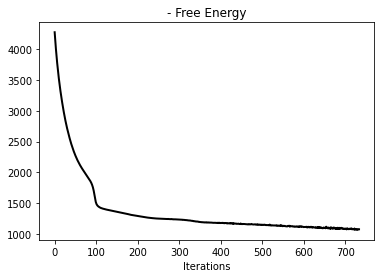

In [5]:
# Plot Loss
plt.figure()
plot_full_loss = False
offset = 10000
step = model.fit_params['ite_prior'] + model.fit_params['ite_factors'] + model.fit_params['ite_inducing_points']
if model.fit_params['inference_mode'] == 'VariationalBound':
    step += model.fit_params['ite_factors_tilde']

plt.plot(model.loss_tot[offset:-1:step], c='k', linewidth=2)
plt.xlabel('Iterations')
plt.title('- Free Energy')

## Plot Model

Use a linear regression to align fit and true latent

In [6]:
# Grasp Variational Marginals
q = model.variational_marginals.suff_stat_mean
current_mean = q[0].detach().clone()
current_vari = diagonalize(q[1].detach().clone().diagonal(dim1=-1, dim2=-2) - current_mean ** 2) 
current_obs  = observations[0]

if torch.cuda.is_available():
    current_mean = current_mean.cpu()
    current_vari = current_vari.cpu()
    current_obs  = current_obs.cpu()
    
# Linear Regression
latent_true, current_mean, current_vari, _ = linear_regression_1D_latent(true_latent_ext, current_mean, current_vari)


Plot Observation and true latent

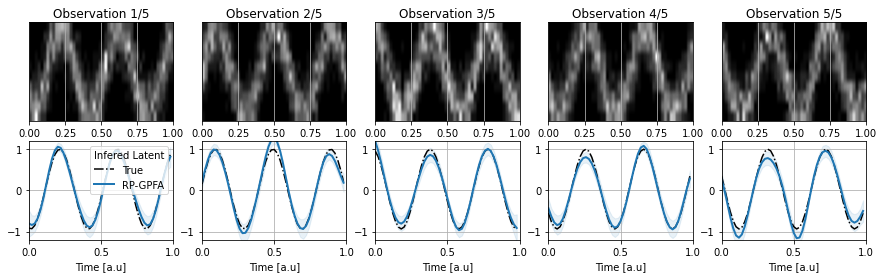

In [7]:
# Obs to be plotted
plot_indices = [0, 1, 2, 3, num_observation -1]

# Problem dimensions
num_observation, len_observation, dim_observation = observations[0].shape
dim_latent = 1

plt.figure(figsize=(3 * len(plot_indices), 2 * 2))
for nn_id in range(len(plot_indices)):

    nn = plot_indices[nn_id]

    # Plot All Pixels in 2D
    plt.subplot(2, len(plot_indices),  1 + nn_id)
    plt.imshow(current_obs[nn].transpose(-1, -2),
               aspect='auto', cmap='gray', extent=[0, 1, -1, 1], origin='lower')
    plt.autoscale(enable=True, axis='x', tight=True)
    #plt.ylabel('n =  ' + str(nn) + '/' + str(num_observation))
    plt.grid()
    plt.yticks([])
    plt.title('Observation ' + str(nn+1) + '/' + str(num_observation))


    # PLot fitted latents
    plt.subplot(2, len(plot_indices),  1 + nn_id + len(plot_indices))
    cmap = plt.get_cmap("tab10")
    for dim_latent_cur in range(dim_latent):

        true = latent_true[nn].squeeze()
        xx = np.arange(len(true)) / len(true)
        plt.plot(xx, true, color='k', label='True', linestyle='-.')

        
        mm = current_mean[nn].squeeze()
        vv = 2 * np.sqrt(current_vari[nn]).squeeze()
 
        plt.plot(xx, mm, color='tab:blue', label='RP-GPFA', linewidth=2)
        plt.fill_between(xx, mm - vv, mm + vv, color='tab:blue', alpha=.1)

    plt.autoscale(enable=True, axis='x', tight=True)
    plt.ylim([-1.2, 1.2])
    plt.yticks([-1, 0, 1])
    plt.grid()
    if nn_id == 0:
        plt.legend(loc=1, title='Infered Latent')
    plt.xlabel('Time [a.u]')
    plt.xticks([0, 0.5, 1])